In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.pipeline import Pipeline

In [2]:
raw_numpy = pd.read_csv("numpy.csv")
raw_pandas = pd.read_csv("pandas.csv")
raw_csharp = pd.read_csv("csharp.csv")
raw_matlab = pd.read_csv("matlab.csv")
raw_matplotlib = pd.read_csv("matplotlib.csv")
raw_mongodb = pd.read_csv("mongodb.csv")
raw_tensorflow = pd.read_csv("tensorflow.csv")
raw_typescript = pd.read_csv("typescript.csv")

In [3]:
print(raw_numpy.shape)
print(raw_pandas.shape)
print(raw_csharp.shape)
print(raw_matlab.shape)
print(raw_matplotlib.shape)
print(raw_mongodb.shape)
print(raw_tensorflow.shape)
print(raw_typescript.shape)

(45005, 1)
(47904, 1)
(45664, 1)
(45921, 1)
(43507, 1)
(44070, 1)
(41255, 1)
(47392, 1)


In [4]:
raw_numpy["Tag"]="numpy"
raw_pandas["Tag"]="pandas"
raw_csharp["Tag"]="csharp"
raw_matlab["Tag"]="matlab"
raw_matplotlib["Tag"]="matplotlib"
raw_mongodb["Tag"]="mongodb"
raw_tensorflow["Tag"]="tensorflow"
raw_typescript["Tag"]="typescript"

In [5]:
print(raw_numpy.shape)
print(raw_pandas.shape)
print(raw_csharp.shape)
print(raw_matlab.shape)
print(raw_matplotlib.shape)
print(raw_mongodb.shape)
print(raw_tensorflow.shape)
print(raw_typescript.shape)

(45005, 2)
(47904, 2)
(45664, 2)
(45921, 2)
(43507, 2)
(44070, 2)
(41255, 2)
(47392, 2)


In [6]:
df = pd.concat([raw_numpy, raw_pandas, raw_csharp, raw_matlab, raw_matplotlib, raw_mongodb, raw_tensorflow, raw_typescript], axis=0)
df = df.reset_index(drop=True)
#df = df[pd.notnull(df['Tag'])]
df.shape

(360718, 2)

In [7]:
print(df['Questions'].apply(lambda x: len(x.split(' '))).sum())

3636886


<AxesSubplot: >

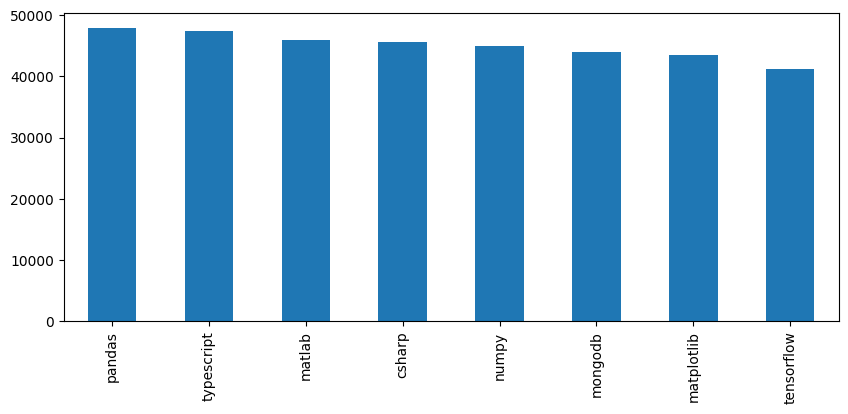

In [8]:
my_tags=["numpy","pandas","csharp","matlab","matplotlib","mongodb","tensorflow","typescript"]

plt.figure(figsize=(10,4))
df.Tag.value_counts().plot(kind='bar')

In [9]:
def print_plot(index):
    example = df[df.index == index][['Questions', 'Tag']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])
print_plot(10)
print_plot(300000)

Sum rows of 2D array with elements of 1D array
Tag: numpy
Running automatic annotation in cvat with tensorflow results in status code 400 "No labels found for tf annotation"
Tag: tensorflow


In [10]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['Questions'] = df['Questions'].apply(clean_text)
print_plot(10)
print_plot(300000)

c:\Users\einst\.conda\envs\tf\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


sum rows 2d array elements 1d array
Tag: numpy
running automatic annotation cvat tensorflow results status code 400 labels found tf annotation
Tag: tensorflow


In [11]:
df['Questions'].apply(lambda x: len(x.split(' '))).sum()

2379141

In [12]:
X = df.Questions
y = df.Tag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [13]:
multi_nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
multi_nb.fit(X_train, y_train)

y_pred = multi_nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7914818511125896
              precision    recall  f1-score   support

       numpy       0.84      0.75      0.79     13615
      pandas       0.80      0.76      0.78     13827
      csharp       0.79      0.82      0.80     13100
      matlab       0.88      0.89      0.88     13252
  matplotlib       0.68      0.58      0.62     13598
     mongodb       0.69      0.82      0.75     14267
  tensorflow       0.84      0.88      0.86     12334
  typescript       0.83      0.86      0.84     14223

    accuracy                           0.79    108216
   macro avg       0.79      0.79      0.79    108216
weighted avg       0.79      0.79      0.79    108216



In [14]:
berno_nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', BernoulliNB()),
              ])
berno_nb.fit(X_train, y_train)

y_pred = berno_nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.8088822355289421
              precision    recall  f1-score   support

       numpy       0.83      0.77      0.80     13615
      pandas       0.83      0.80      0.81     13827
      csharp       0.80      0.84      0.82     13100
      matlab       0.90      0.89      0.90     13252
  matplotlib       0.70      0.60      0.65     13598
     mongodb       0.73      0.82      0.77     14267
  tensorflow       0.85      0.89      0.87     12334
  typescript       0.84      0.86      0.85     14223

    accuracy                           0.81    108216
   macro avg       0.81      0.81      0.81    108216
weighted avg       0.81      0.81      0.81    108216



In [15]:
comp_nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', ComplementNB()),
              ])
comp_nb.fit(X_train, y_train)

y_pred = comp_nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.8069231906557256
              precision    recall  f1-score   support

       numpy       0.86      0.75      0.80     13615
      pandas       0.84      0.79      0.81     13827
      csharp       0.77      0.87      0.82     13100
      matlab       0.87      0.91      0.89     13252
  matplotlib       0.77      0.54      0.63     13598
     mongodb       0.72      0.82      0.76     14267
  tensorflow       0.82      0.93      0.87     12334
  typescript       0.83      0.87      0.85     14223

    accuracy                           0.81    108216
   macro avg       0.81      0.81      0.80    108216
weighted avg       0.81      0.81      0.80    108216

